In [1]:
# Start (as usual) by loading libraries
import numpy as np
import pandas as pd
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns

# For inline graphics
%matplotlib inline

## Visualizations

Visualizations can help us look at summaries of the data. They can also aid in providing good presentation aids.

In this section, we'll look at a few basic types of visualizations: histograms, boxplots, lineplots. In practice, there are many more types of visualizations. Furthermore, there are many different packages that can help you create these different visualizations. While we'll focus only on the basics here with the `matplotlib` package, keep in mind that there are many tools available.

### Making a Histogram
We'll start with a basic histogram. A histogram is useful for looking at the distribution of a numerical variable (that is, a variable that takes numbers as its values as opposed to categories). They can visually represent the spread and center of the variable, as well as provide insights to the shape of the distribution. For example, we can look at the number of **modes**, or peaks, in the data, which wouldn't be captured in numerical summaries such as mean or variance. We can also get a better idea of the **skew** of the data, determining whether most units are grouped on the left or right side (lower or higher values), or whether it's mostly symmetrical. 

We'll first look at the simplest way to make a graph, then show how to customize it using the plotting parameters as well as Figure and Axes objects. Let's look at a histogram of the total jobs in the 2015 Workplace Area Characteristics for California.

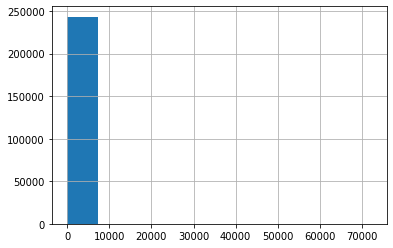

In [3]:
df_2015 = pd.read_csv('https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_2015.csv.gz', compression = 'gzip')
df_2015['C000'].plot(kind='hist')

The `plot()` method is the basic plotting tool that you will use. We're using it with the **Series** object `df_2015['C000']`, so it takes the values in that Series and plots it. We specify `kind='hist'` to say that we want a histogram. We can also use the `hist()` method to plot a histogram.

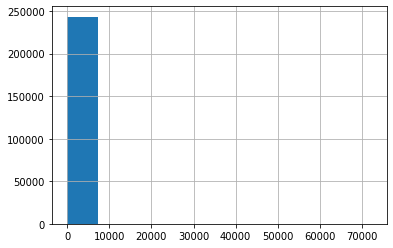

In [4]:
df_2015['C000'].hist()

Now this histogram is quite unhelpful. It's very hard to see, but it's probably because there is an outlier that is forcing the boxplot into this scaling, and giving us a very limited view of the data because almost every observation is in one bar. We can fix these using some additional parameters.

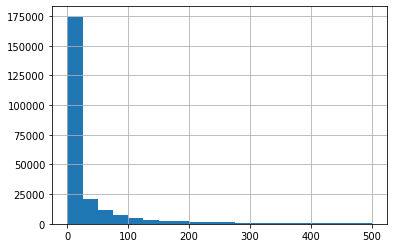

In [5]:
df_2015['C000'].hist(bins=20, range=[0,500])

That looks much better! We specify the number of bins at 20 (that is, how many rectangles we want in the plot), as well as a range for the x-axis. In this case, since there are some very high values that would stretch the graph out, we cut it off at 500.

Now, what if we want to make this look nicer, maybe by adding some labels? We can do that too using the Figure and Axes objects. 

Text(0.5, 1.0, 'California Workplace Area Characteristics (2015) Total Jobs')

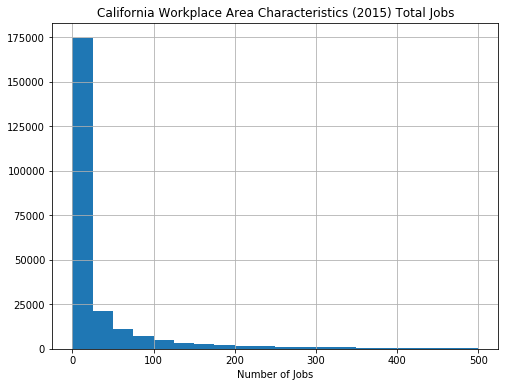

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
df_2015['C000'].hist(bins=20, range=[0,500])
ax.set_xlabel("Number of Jobs")
ax.set_title("California Workplace Area Characteristics (2015) Total Jobs")

Let's break down each line of the code. First, we used the command 

`fig, ax = plt.subplots(figsize=(8,6))`.

This is where we intialize our plot, essentially setting up the space that we'll be working in. It creates a **Figure** object (`fig`) and an **Axes** object (`ax`). The Figure is the window in which we'll create our plot. In this case, we use the `figsize` argument to set the length and height to 8 and 6 inches, respectively. The Axes are the area around the figure, where the tick labels and titles are. 

Then, we plot the figure by taking the pandas Series and using the `plot()` method. We use the same parameters as before, limiting the number of bins as well as the range of the x-axis. After that, we use the `ax` object to add labels around the figure, using the `set_xlabel()` and `set_title()` methods. 

### Making a Boxplot

A boxplot is also used for numerical data, and can be used in a similar manner to histograms in showing the distribution of the data. Instead of putting everything into bins, though, a boxplot plots the median, 25th percentile, and 75th percentile, along with outer limits and outliers. This makes for a simpler graph, and can be especially useful for comparing the distribution of multiple groups. However, unlike with histograms, you don't get any information about the number of modes.

The code for making a boxplot starts off very similar to that of making a histogram. We'll initialize the plot, then when using `plot()`, we'll use `kind="box"` instead of `kind="hist"`.

Text(0, 0.5, 'Number of Jobs')

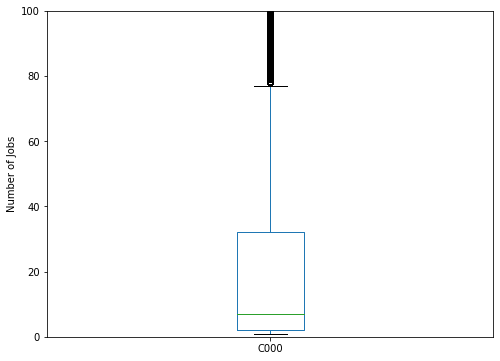

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
df_2015['C000'].plot(kind="box")
ax.set_ylim(0,100)
ax.set_ylabel("Number of Jobs")

Instead of setting `range=[0,100]` like we did before, we used the Axes method `set_ylim` to set the limits of the y-axis to be 0 and 100. Other than that, the code from before should look very familiar.

Let's now try making multiple boxplots to compare.

Text(0, 0.5, 'Number of Jobs')

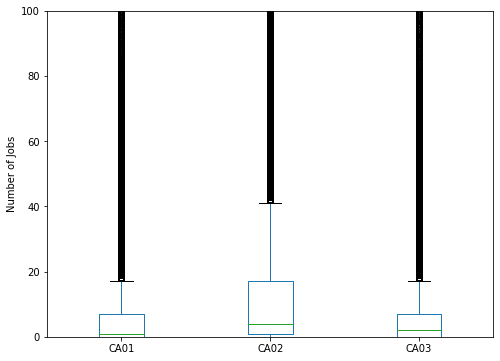

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
vars_to_plot = ['CA01','CA02','CA03']
df_2015[vars_to_plot].plot(kind="box", ax=ax)
ax.set_ylim(0,100)
ax.set_ylabel("Number of Jobs")

Here, we want multiple columns from the Data Frame, so instead of a Series object, we have a Data Frame object. Notice that we were able to select the proper columns from the Data Frame by using a List inside the square brackets. 